# Prepare data for training
## First level (binary evaluation) NONE or OTHER

In [1]:
import pandas as pd
from _datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('20210106_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
# df = pd.read_csv('20210116_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
df = pd.read_csv('dataset/20210604_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])

df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,8.0,DAY,TO,2,MONTH,Full recovery is likely to take a month or more.,Full recovery is likely to take a month or more
1,NHS,Abdominal aortic aneurysm,IMPROVE,FAST,FROM,5.0,MINUTE,TO,1,DAY,"The screening test is very quick, painless and...","The screening test is very quick, painless and..."
2,NHS,Abdominal aortic aneurysm,IMPROVE,FAST,FROM,5.0,MINUTE,TO,1,DAY,The test involves a quick and painless ultraso...,The test involves a quick and painless ultraso...
3,NHS,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,2.0,MONTH,TO,6,MONTH,You'll normally stay in hospital for 2 or 3 da...,it can take a few weeks or months to fully rec...
4,NHS,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,2.0,MONTH,TO,6,MONTH,You'll usually stay in hospital for 7 to 10 da...,it will take a few weeks or months to fully re...


In [3]:
df.drop_duplicates(subset=['Sentence'], keep = "first", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     1983 non-null   object 
 1   condition  1983 non-null   object 
 2   fr0        1983 non-null   object 
 3   fr1        406 non-null    object 
 4   fr2        406 non-null    object 
 5   fr3        406 non-null    float64
 6   fr4        406 non-null    object 
 7   fr5        406 non-null    object 
 8   fr6        406 non-null    object 
 9   fr7        406 non-null    object 
 10  Sentence   1983 non-null   object 
 11  CEsnippet  1981 non-null   object 
dtypes: float64(1), object(11)
memory usage: 201.4+ KB


In [4]:
df['fr3'] = df['fr3'].fillna(0).astype(int)
df.loc[df['fr3'].notnull(), 'fr3f'] = df['fr3'].map(str)

df.loc[df['fr6'].isnull(),'fr6f'] = ''
#df.loc[df['fr6']==0,'fr6f'] = ''
df.loc[df['fr6'].notnull(), 'fr6f'] = df['fr6'].map(str)

df.loc[df['fr3f']=='0','fr3f'] = ''
df.loc[df['fr6f']=='0','fr6f'] = ''

df['reviewedTag'] = df.fr0.fillna('') + (' ') + df.fr1.fillna('')+ (' ') + df.fr2.fillna('') + (' ') +df.fr3f+ (' ' + df.fr4).fillna('')+ (' ' + df.fr5).fillna('')+ (' ') + df.fr6f+ (' ' + df.fr7).fillna('')
df['reviewedTag'] = df['reviewedTag'].str.strip()

In [5]:
df.loc[df['fr0'] == 'NONE','newTag'] = 'NO'
df.loc[df['fr0'] != 'NONE', 'newTag'] = 'YES'
#adding a new column with binary tags: YES = 1 , NO = 0
#using this format to implement BERT transformer
df.loc[df['newTag'] == 'YES','binTag'] = 1
df.loc[df['newTag'] == 'NO', 'binTag'] = 0
df['binTag'] = df['binTag'].astype('int32')
df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet,fr3f,fr6f,reviewedTag,newTag,binTag
0,MAYO,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,8,DAY,TO,2,MONTH,Full recovery is likely to take a month or more.,Full recovery is likely to take a month or more,8,2,IMPROVE MODERATELY FROM 8 DAY TO 2 MONTH,YES,1
1,NHS,Abdominal aortic aneurysm,IMPROVE,FAST,FROM,5,MINUTE,TO,1,DAY,"The screening test is very quick, painless and...","The screening test is very quick, painless and...",5,1,IMPROVE FAST FROM 5 MINUTE TO 1 DAY,YES,1
2,NHS,Abdominal aortic aneurysm,IMPROVE,FAST,FROM,5,MINUTE,TO,1,DAY,The test involves a quick and painless ultraso...,The test involves a quick and painless ultraso...,5,1,IMPROVE FAST FROM 5 MINUTE TO 1 DAY,YES,1
3,NHS,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,2,MONTH,TO,6,MONTH,You'll normally stay in hospital for 2 or 3 da...,it can take a few weeks or months to fully rec...,2,6,IMPROVE MODERATELY FROM 2 MONTH TO 6 MONTH,YES,1
4,NHS,Abdominal aortic aneurysm,IMPROVE,MODERATELY,FROM,2,MONTH,TO,6,MONTH,You'll usually stay in hospital for 7 to 10 da...,it will take a few weeks or months to fully re...,2,6,IMPROVE MODERATELY FROM 2 MONTH TO 6 MONTH,YES,1


In [6]:
df.newTag.value_counts(dropna=False)

NO     1436
YES     547
Name: newTag, dtype: int64

In [7]:
df.binTag.value_counts(dropna=False)

0    1436
1     547
Name: binTag, dtype: int64

In [56]:
col = ['source','condition','CEsnippet','Sentence','newTag','binTag','reviewedTag']
df = df[col]

df.columns
df.head()

,source,condition,CEsnippet,Sentence,newTag,binTag,reviewedTag
0,MAYO,Acute kidney failure,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...,YES,1,DECLINE FAST FROM 1 DAY TO 1 WEEK
1,MAYO,Systemic mastocytosis,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis...",YES,1,DECLINE FAST FROM 1 DAY TO 1 WEEK
2,MAYO,Plague,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...,YES,1,DECLINE FAST FROM 1 DAY TO 1 WEEK
3,MAYO,Dermatographia,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an...",YES,1,DECLINE FAST FROM 1 DAY TO 1 WEEK
4,NHS,Epiglottitis,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...,YES,1,DECLINE FAST FROM 1 DAY TO 1 WEEK


In [57]:
#Save the boolean tags
#df.to_csv(str(date.today())+'_datasetBoolean.csv', index = False)
#Save binary tags
df.to_csv('dataset/'+str(date.today())+'_datasetCeroLevelBinary.csv', index = False)
#df.to_csv('2021-01-11_datasetCeroLevelBinary.csv', index = False)

Text(0.5, 1.0, 'Number of sentences per class')

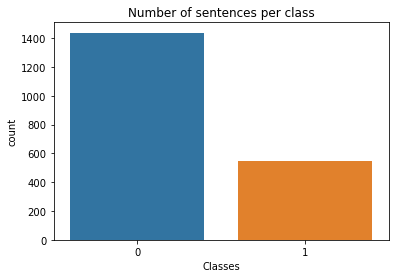

In [58]:
sns.countplot(x=df.binTag, data=df)
plt.xlabel('Classes')
plt.title('Number of sentences per class')

In [59]:
p = df['binTag'].value_counts()#.to_dict()
q = df['binTag'].value_counts(normalize=True)
r = pd.concat([p.rename('Count'),q.rename('Proportion')],axis=1)
print(r)

   Count  Proportion
0   1437     0.72466
1    546     0.27534
